***Implementation of a Neural Network from scratch***

In [12]:
import numpy as np
import random

**Load and prepare data - classification2.txt**

Data is stored in X and label is stored in y

In [13]:
PATH = "data/classification2.txt" #Data format: [feature_1, feature_2, label]

X,y = [], []
data_set = []
with open(PATH, "r") as file:
    for line in file:
        clean_line = line.strip()
        train_test = clean_line.split(",")
        
        data_set.append(np.array([float(s) for s in train_test]))

data_set = np.array(data_set)
data_set.shape

(118, 3)

**Data preparation**

- shuffling of data set
- divide into features and labels
- standardize
- split to train and test

In [14]:
np.random.seed(42)

data_set = np.random.permutation(data_set)


X, y = data_set[:,:-1], data_set[:,-1].reshape(-1,1)

train_test_split = 0.8
m_train = int(len(data_set)*train_test_split)
X_train, y_train = X[:m_train], y[:m_train]
X_test, y_test = X[m_train:], y[m_train:]

X_train.shape, y_train.shape, X_test.shape, y_test.shape, data_set.shape

((94, 2), (94, 1), (24, 2), (24, 1), (118, 3))

**Standarize data**

In [ ]:
from utils import standardize

X_train, X_test,MU_TRAIN,STD_TRAIN = standardize(X_train, X_test)

In [16]:
def accuracy(pred, labels):

    comparison = (pred==labels)
    correct_pred = np.count_nonzero(comparison)
    return correct_pred/len(labels)

**Training**

In [ ]:
from Model import NeuralNet
from utils import test, train, binary_cross_entropy

np.random.seed(42)

epochs = 4000
lr = 1
hidden_layer_units = [4,4]


NN_1 = NeuralNet(n_inputs=X.shape[1],hidden_layers=hidden_layer_units,n_output=y.shape[1])

loss_fn = binary_cross_entropy


best_acc = -1
best_W = None
best_epoch = 0

train_loss_history = [] #For logging and plotting
train_acc_history = []
test_loss_history = []
test_acc_history = []

for epoch in range(epochs):
    if epoch%5000 == 0:
        lr = lr/5
        print("Lowered lr",lr)

    train_loss, train_acc = train(NN_1, X_train, y_train, loss_fn=loss_fn, lr=lr)
    train_loss_history.append(train_loss)
    train_acc_history.append(train_acc)

    test_loss, test_acc = test(NN_1, X_test, y_test)
    test_loss_history.append(test_loss)
    test_acc_history.append(test_acc)

    if test_acc>best_acc:
        best_acc = test_acc
        print("New best acc:")
        print(f"train loss: {train_loss}, train acc: {train_acc}, test loss: {test_loss}, test acc: {test_acc}, epoch: {epoch}")
        best_W = [W.copy() for W in NN_1.W]
        best_epoch = epoch

    if epoch % 500 == 0:
        print(f"Epoch[{epoch}] | train loss {train_loss} - train acc {train_acc} | test loss {test_loss} - test acc {test_acc}")



NN_1.W = [W.copy() for W in best_W]



Lowered lr 0.2
New best acc:
train loss: [0.69482645], train acc: 0.44680851063829785, test loss: [0.48084637], test acc: 0.4583333333333333, epoch: 0
Epoch[0] | train loss [0.69482645] - train acc 0.44680851063829785 | test loss [0.48084637] - test acc 0.4583333333333333
New best acc:
train loss: [0.69056259], train acc: 0.5425531914893617, test loss: [0.5090811], test acc: 0.5, epoch: 187
New best acc:
train loss: [0.688249], train acc: 0.5851063829787234, test loss: [0.51180371], test acc: 0.5416666666666666, epoch: 379
New best acc:
train loss: [0.68785915], train acc: 0.574468085106383, test loss: [0.51222853], test acc: 0.5833333333333334, epoch: 412
New best acc:
train loss: [0.68752674], train acc: 0.574468085106383, test loss: [0.5125808], test acc: 0.625, epoch: 440
Epoch[500] | train loss [0.6868058] - train acc 0.5638297872340425 | test loss [0.51331145] - test acc 0.625
Epoch[1000] | train loss [0.67968855] - train acc 0.5851063829787234 | test loss [0.51811601] - test acc

In [ ]:
NN = NeuralNet(n_inputs=4, hidden_layers=[6,6], n_output=2)

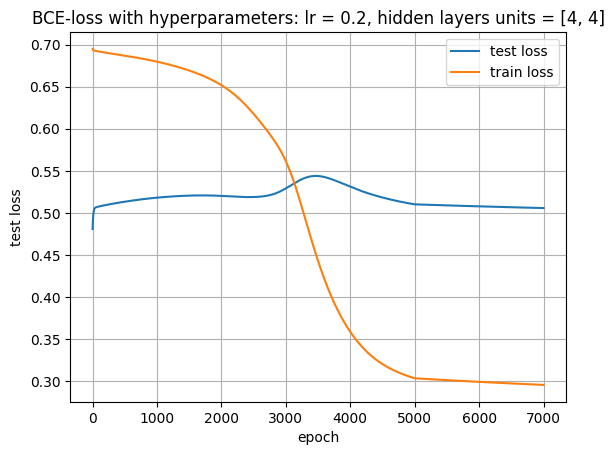

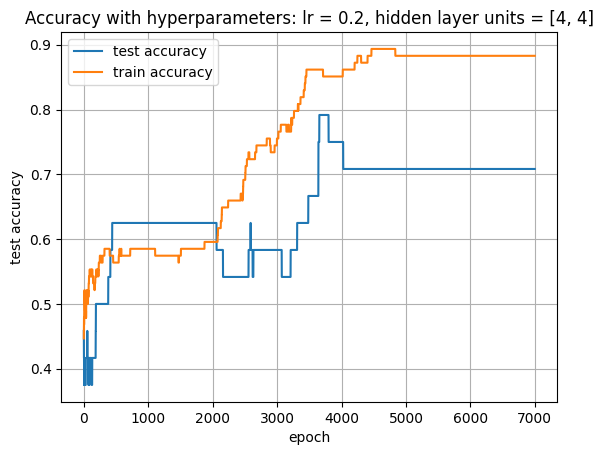

In [18]:
import matplotlib.pyplot as plt

plt.plot(test_loss_history,label="test loss")
plt.plot(train_loss_history, label = "train loss")
plt.xlabel("epoch")
plt.ylabel("test loss")
plt.grid(True)
plt.legend()
plt.title(f"BCE-loss with hyperparameters: lr = {0.2}, hidden layers units = {[4, 4]}")
plt.show()

plt.plot(test_acc_history, label="test accuracy")
plt.plot(train_acc_history, label = "train accuracy")
plt.xlabel("epoch")
plt.ylabel("test accuracy")
plt.grid(True)
plt.legend()
plt.title(f"Accuracy with hyperparameters: lr = 0.2, hidden layer units = [4, 4]")
plt.show()


C:\Users\knutr\AppData\Local\Temp\ipykernel_33068\2942462694.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  z[i,j] = net_z_output(model=NN_1,x=x, mean=MU_TRAIN,std=STD_TRAIN)  # saida do modelo antes de aplicar a função sigmoide - substituir aqui teu código
C:\Users\knutr\AppData\Local\Temp\ipykernel_33068\2942462694.py:28: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc=0)


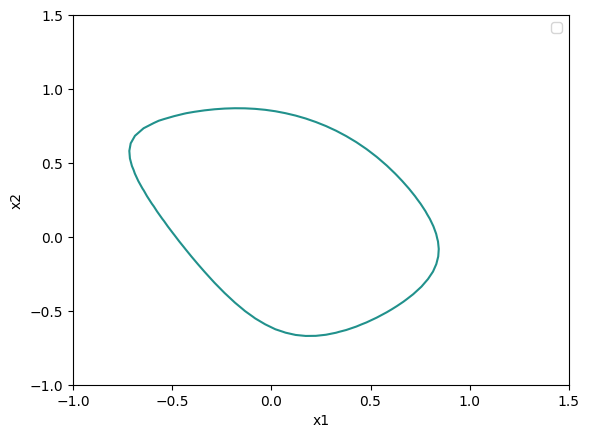

In [ ]:

x1s = np.linspace(-1,1.5,50)
x2s = np.linspace(-1,1.5,50)
z=np.zeros((len(x1s),len(x2s)))

def sigmoid_inv(z):
    return  np.log(z/(1-z))

def net_z_output(model: NeuralNet, x, mean, std):
    x = (x-mean.T)/std.T
    output_sig = model.forward_prop(x)[-1]
    logit = sigmoid_inv(output_sig)
    return logit



for i in range(len(x1s)):
    for j in range(len(x2s)):
        x = np.array([x1s[i], x2s[j]]).reshape(2,-1)
        z[i,j] = net_z_output(model=NN_1,x=x, mean=MU_TRAIN,std=STD_TRAIN)  # saida do modelo antes de aplicar a função sigmoide - substituir aqui teu código
        
    
plt.contour(x1s,x2s,z.T,0)
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend(loc=0)

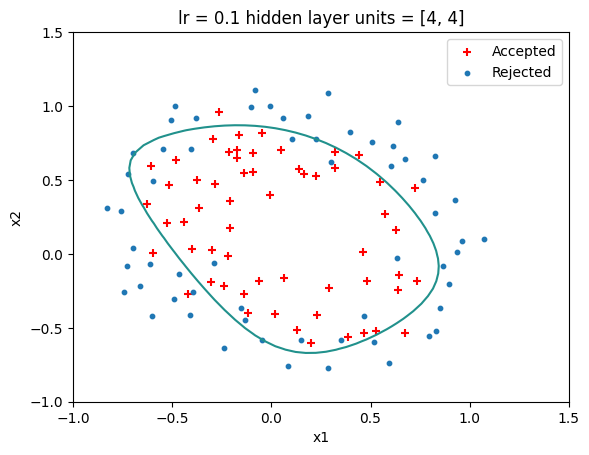

In [ ]:
import pandas as pd
df=pd.read_csv("data/classification2.txt", header=None)

X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
pos , neg = (y==1).reshape(118,1) , (y==0).reshape(118,1)
plt.scatter(X[pos[:,0],0],X[pos[:,0],1],c="r",marker="+")
plt.scatter(X[neg[:,0],0],X[neg[:,0],1],marker="o",s=10)
plt.contour(x1s,x2s,z.T,0)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title(f"lr = {lr/5} hidden layer units = {hidden_layer_units}")
plt.legend(["Accepted (1)","Rejected (0)"],loc=0)